### Dealing with exch2 output

Tiles are not in order and gluemncbig does not work. So you have to use the functions in the MITgcmutils package. Here I try to figure out what to do with this output, how to plot it, etc.


In [1]:
from netCDF4 import Dataset
import cmocean as cmo
import matplotlib.pyplot as plt
%matplotlib inline
import MITgcmutils as mit
import numpy as np
import sys
sys.path.append('/Users/Karina/Research/SWOT-Scripps/notebooks_SVB/')
import svb_tools as svb
import warnings
warnings.filterwarnings('ignore')

In [2]:
outdir = '/Users/Karina/Tools/MITgcm/SVB/05_448x512x100/01_base/mnc_test_0001/'

### MNC Functions

### `MITgcmutils.mnc.MNC` and  `MITgcmutils.mnc.mnc_files`
A file object for MNC (tiled NetCDF) data. (I don't get the difference between these two)

In [24]:
nc = mit.mnc.MNC(outdir+'grid.t*.nc', layout='exch2')
depth = nc.variables['Depth'][:]
nc.close()
np.shape(depth)

# Depth is now assembled (global) arrays of shape (Ny, Nx). 
# The empty tiles are filled in so I get a nice ny x nx array (see plot below)

(512, 448)

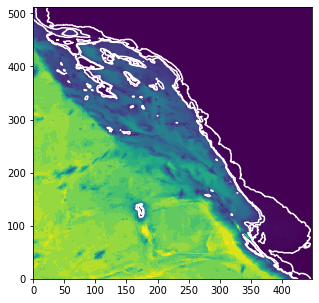

In [25]:
fig,ax = plt.subplots(1,1, figsize=(5,5))
ax.pcolormesh(depth)
ax.contour(depth, levels=[0, 250, 500], colors='w')

In [26]:
nc = mit.mnc.mnc_files(outdir+'grid.t*.nc', layout='exch2')
depth = nc.variables['Depth'][:]
nc.close()
np.shape(depth)

(512, 448)

### `MITgcmutils.mnc.rdmnc` 
Read one or more variables from an mnc file set. Can currently read only one file set (i.e., 1 file per tile), not several files split in time.

Consider using mnc_files for more control (and similar convenience). The same restriction about multiple files applies, however.

In [30]:
S = mit.mnc.rdmnc(outdir+'state.0000000000.*', ['U', 'V'], slices=np.s_[..., 10:-10, 10:-10])
u = S['U']
v = S['V']
print(np.shape(u))

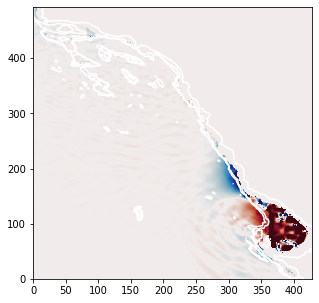

In [43]:
fig,ax = plt.subplots(1,1, figsize=(5,5))
ax.pcolormesh(v[1,20,:,:], cmap=cmo.cm.balance, vmax=0.001, vmin=-0.001)
ax.contour(depth[10:-10, 10:-10], levels=[0, 250, 500], colors='w')

In [44]:
dyn = mit.mnc.rdmnc(outdir+'dynVars.0000000000.*', ['UVEL'], slices=np.s_[100,:, 10:-10, 10:-10])
uvel = dyn['UVEL']

print(np.shape(uvel))

(76, 492, 429)


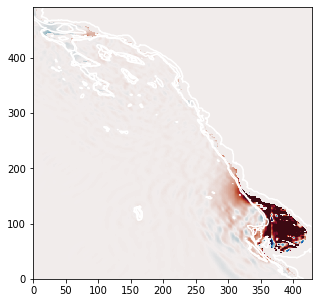

In [45]:
fig,ax = plt.subplots(1,1, figsize=(5,5))
ax.pcolormesh(uvel[20,:,:], cmap=cmo.cm.balance, vmax=0.001, vmin=-0.001)
ax.contour(depth[10:-10, 10:-10], levels=[0, 250, 500], colors='w')

There are other useful functions in this package, e.g. for calculating divergence and gradients, but the ones above are the relevant ones to deal with tiles from exch2 output.